**1) Consider the “College” data in the ISLR2 package:
    > library(ISLR2)
    >data(College)
    > head(College)**
**a) Present some visualizations of this data such as pair plots and histograms? Do you think any scaling or transformation is required?**


In [1]:
rm(list = ls())
install.packages("ISLR2")
library(ISLR2)
ls("package:ISLR2")
head(College)

installing the source package 'ISLR2'



[1] "Auto"        "Bikeshare"   "Boston"      "BrainCancer" "Caravan"    
 [6] "Carseats"    "College"     "Credit"      "Default"     "Fund"       
[11] "Hitters"     "Khan"        "NCI60"       "NYSE"        "OJ"         
[16] "Portfolio"   "Publication" "Smarket"     "Wage"        "Weekly"

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


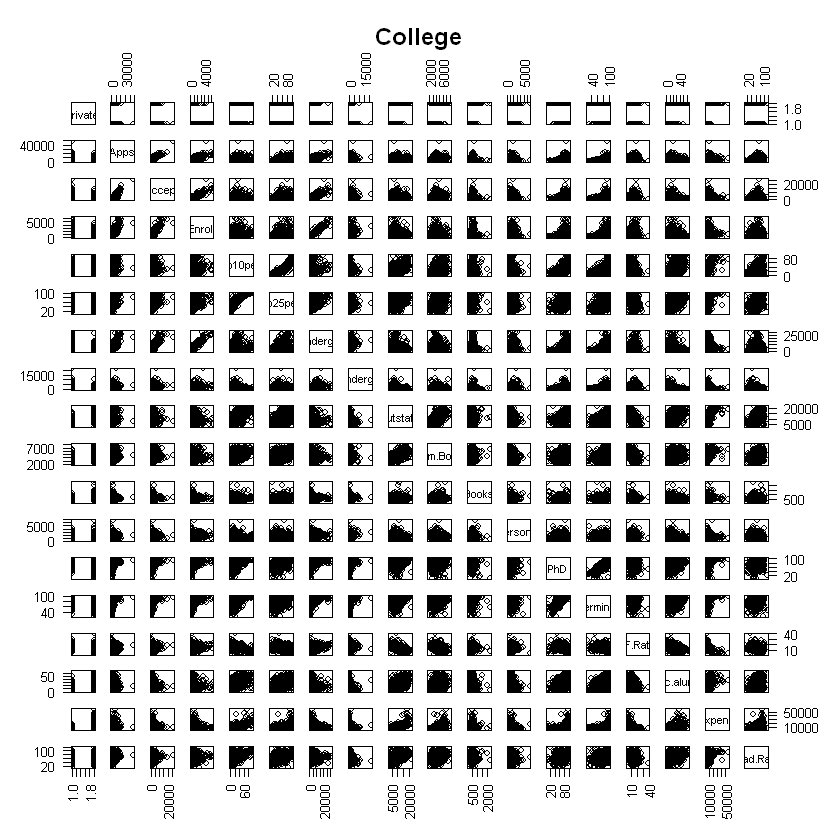

In [2]:
#Plot a pair plot
pairs(College, las=2, main= "College")

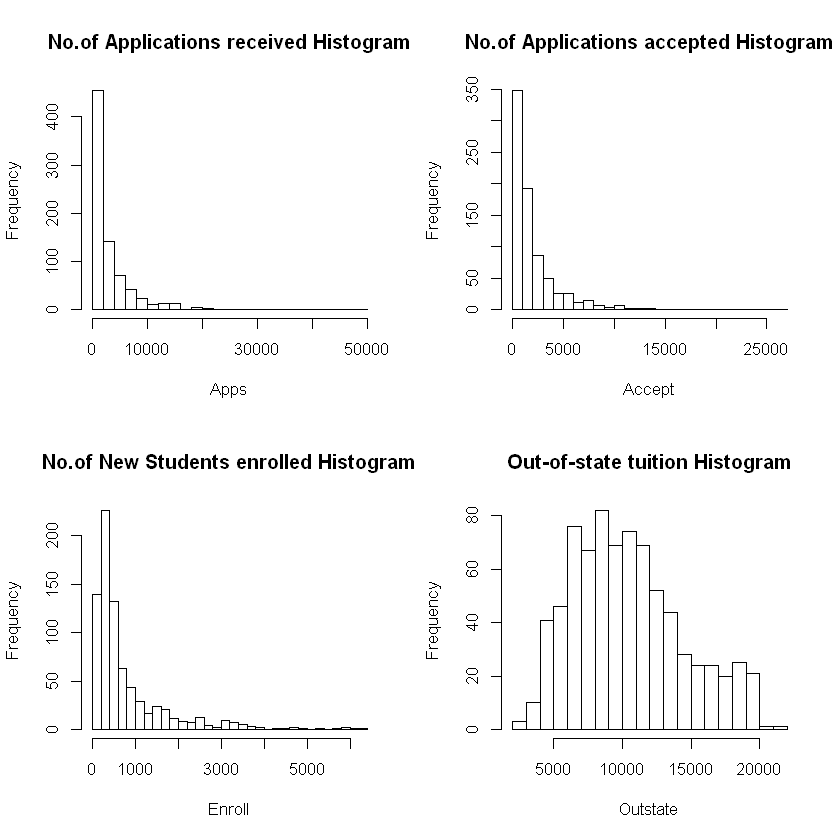

In [3]:
#plot Histograms
par(mfrow=c(2,2))
hist(College[,2], breaks = 25, main = "No.of Applications received Histogram", xlab = "Apps")
hist(College[,3], breaks = 25, main = "No.of Applications accepted Histogram", xlab = "Accept")
hist(College[,4], breaks = 25, main = "No.of New Students enrolled Histogram", xlab = "Enroll")
hist(College[,9], breaks = 25, main = "Out-of-state tuition Histogram", xlab = "Outstate")

In [7]:
#Check whether scaling required or not
install.packages("moments")
library(moments)
sapply(College[, -1], skewness)


  There is a binary version available but the source version is later:
        binary source needs_compilation
moments   0.14 0.14.1             FALSE



installing the source package 'moments'



Apps      Accept      Enroll   Top10perc   Top25perc F.Undergrad 
  3.7165574   3.4111259   2.6852679   1.4104871   0.2588394   2.6054157 
P.Undergrad    Outstate  Room.Board       Books    Personal         PhD 
  5.6813582   0.5082943   0.4764335   3.4782933   1.7391308  -0.7666864 
   Terminal   S.F.Ratio perc.alumni      Expend   Grad.Rate 
 -0.8149652   0.6661462   0.6057190   3.4526399  -0.1135575

As shown above some of the variables have right-skewness greater than 0.5, so they need to be scaled using log transformation. So, that the distribution will be more symmetrical and it is easy to identify patterns and also will reduce the effect of outliers.

**b) Scale the data appropriately (e.g., log transform) and present the visualizations in part A. Have any new relationships been revealed.**

In [8]:
# Applying log transformation to the data
College <- College
College[, c(2:3,7:12,17)] <- log(College[,c(2:3,7:12,17)])
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,7.414573,7.116394,721,23,52,7.967280,6.285998,8.914626,8.101678,6.109248,7.696213,70,78,18.1,12,8.859505,60
Adelphi University,Yes,7.689829,7.562162,512,16,29,7.894691,7.112327,9.415727,8.771835,6.620073,7.313220,29,30,12.2,16,9.261699,56
Adrian College,Yes,7.264030,7.000334,336,22,50,6.943122,4.595120,9.328123,8.229511,5.991465,7.060476,53,66,12.9,30,9.075093,54
Agnes Scott College,Yes,6.033086,5.855072,137,60,89,6.234411,4.143135,9.469623,8.603371,6.109248,6.774224,92,97,7.7,37,9.853036,59
Alaska Pacific University,Yes,5.262690,4.983607,55,16,44,5.517453,6.767343,8.930626,8.323608,6.684612,7.313220,76,72,11.9,2,9.298534,15
Albertson College,Yes,6.375025,6.171701,158,38,62,6.519147,3.713572,9.510445,8.112228,6.214608,6.514713,67,73,9.4,11,9.182661,55


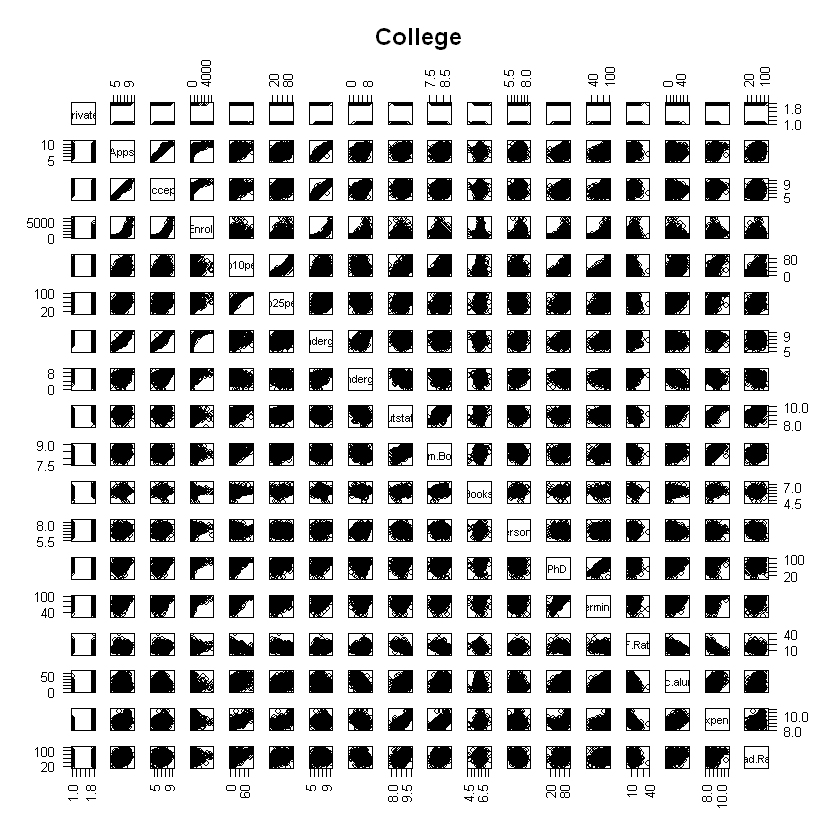

In [13]:
#Plot a pair plot
pairs(College, las=2, main= "College")

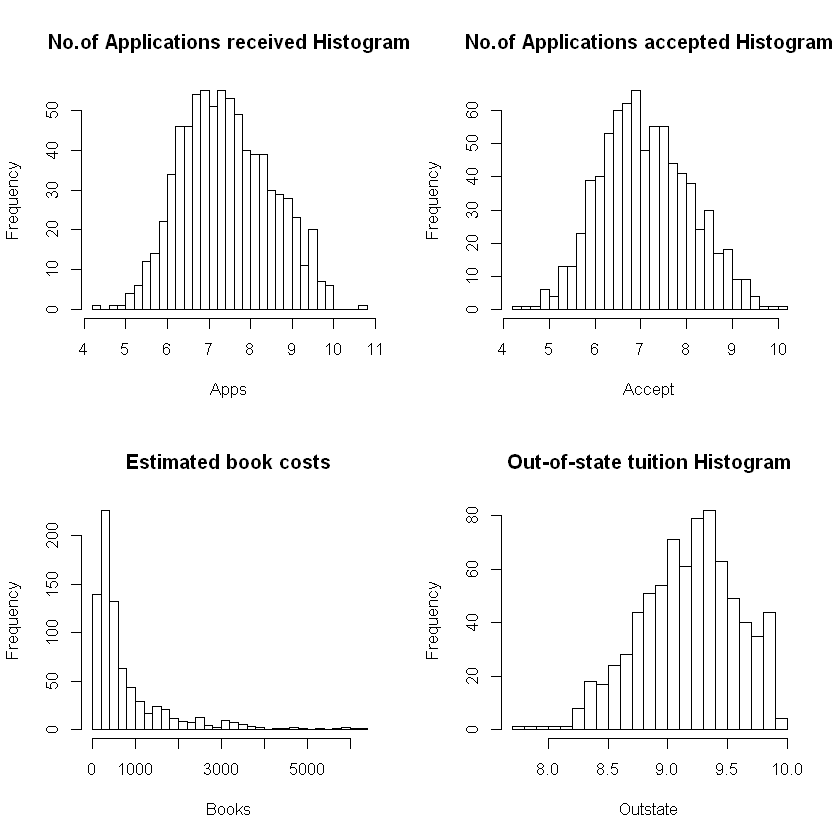

In [14]:
#plotting Histograms
par(mfrow=c(2,2))
hist(College[,2], breaks = 25, main = "No.of Applications received Histogram", xlab = "Apps")
hist(College[,3], breaks = 25, main = "No.of Applications accepted Histogram", xlab = "Accept")
hist(College[,4], breaks = 25, main = "Estimated book costs", xlab = "Books")
hist(College[,9], breaks = 25, main = "Out-of-state tuition Histogram", xlab = "Outstate")

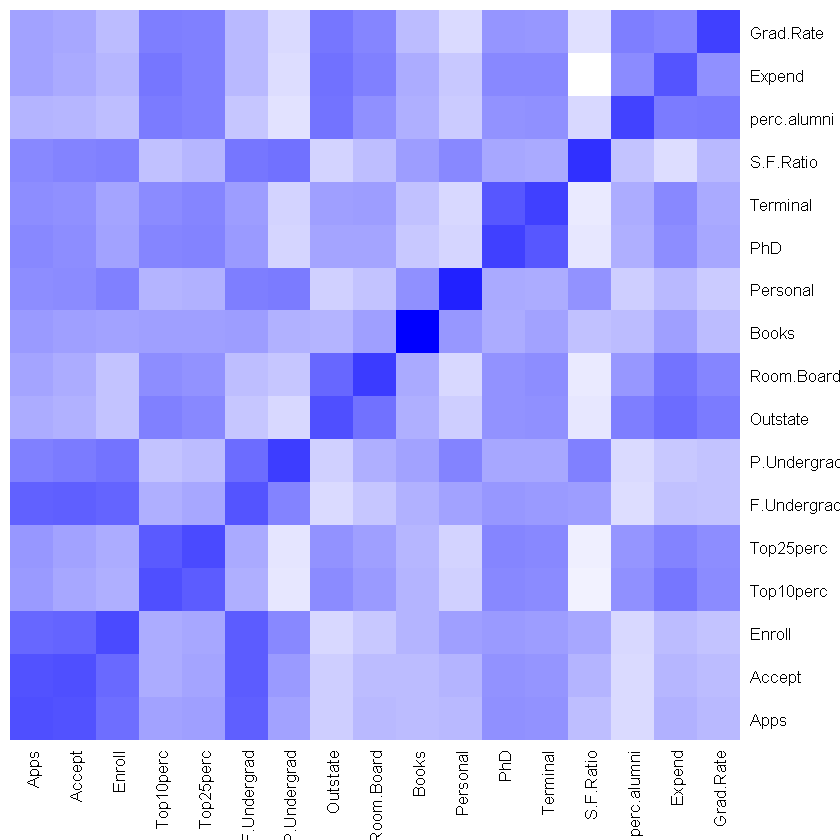

In [16]:
# Calculate the correlation matrix
corr_matrix <- cor(College[,-1])
# Create a heatmap
heatmap(corr_matrix, Rowv = NA, Colv = NA, col = colorRampPalette(c("white", "blue"))(100))

After applying the log transformation, we can see that the variables are more normally distributed. 
Additionally, in the scatterplot matrix, the relationship between "Outstate" and "Private" is less clear.
Number of new students Enrolled and Number of applications accepted are linearly related with Number of application Recieved .
Number of fulltime Undergraduate students has linear relationship with Number of applications recieved, accepted and new students enrolled.
Student-Faculty Ratio and Out-of-state tution are non linearly related.
Instructional expenditure per student and out-of-state tutiion are linearly related.

**c) Subset the data into two data frames: “private” and “public”.  Sort them alphabetically.  Save them as tab delimited txt files. Be sure these are the only two objects saved in that file. Submit it with your assignment (only on ublearns).** 

In [17]:
# Forming the dataframes public and private
private <- College[College$Private == "Yes",]
public <- College[College$Private == "No",]

In [18]:
# Sorting the data frames alphabetically by using the rownames
private <- private[order(rownames(private)), ]
public <- public[order(rownames(public)), ]

In [19]:
head(private)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,7.414573,7.116394,721,23,52,7.967280,6.285998,8.914626,8.101678,6.109248,7.696213,70,78,18.1,12,8.859505,60
Adelphi University,Yes,7.689829,7.562162,512,16,29,7.894691,7.112327,9.415727,8.771835,6.620073,7.313220,29,30,12.2,16,9.261699,56
Adrian College,Yes,7.264030,7.000334,336,22,50,6.943122,4.595120,9.328123,8.229511,5.991465,7.060476,53,66,12.9,30,9.075093,54
Agnes Scott College,Yes,6.033086,5.855072,137,60,89,6.234411,4.143135,9.469623,8.603371,6.109248,6.774224,92,97,7.7,37,9.853036,59
Alaska Pacific University,Yes,5.262690,4.983607,55,16,44,5.517453,6.767343,8.930626,8.323608,6.684612,7.313220,76,72,11.9,2,9.298534,15
Albertson College,Yes,6.375025,6.171701,158,38,62,6.519147,3.713572,9.510445,8.112228,6.214608,6.514713,67,73,9.4,11,9.182661,55


In [20]:
head(public)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Angelo State University,No,8.171882,7.601402,1016,24,54,8.340456,7.321189,8.542861,8.186464,6.214608,7.600902,60,62,23.1,5,8.296547,34
Appalachian State University,No,8.897409,8.447629,1910,20,63,9.204322,6.942157,8.825560,7.839919,4.564348,7.600902,83,96,18.3,14,8.674880,70
Arizona State University Main campus,No,9.457903,9.240676,3761,24,49,10.025395,8.933928,8.913819,8.486734,6.551080,7.649693,88,93,18.9,5,8.434246,48
Arkansas Tech University,No,7.458186,7.455298,951,12,52,8.189245,6.844815,8.149024,7.882315,6.109248,6.907755,57,60,19.6,5,8.463581,48
Auburn University-Main Campus,No,8.929038,8.823353,3070,25,57,9.696586,7.447751,8.748305,8.277158,6.396930,7.553811,85,91,16.7,18,8.801168,69
Bemidji State University,No,7.096721,6.776507,546,12,36,8.241703,6.714171,8.395026,7.901007,6.492240,7.495542,57,62,19.6,16,8.230044,46


In [21]:
#Save the public and private dataframes as tab delimited *txt files
write.table(public, "public_colleges.txt", sep = "\t", row.names = TRUE,col.names = colnames(College))
write.table(private, "private_colleges.txt", sep = "\t", row.names = TRUE,col.names = colnames(College))

**d) Within each new data frame from part C, eliminate Universities that have less than the median number of HS students admitted from the top 25% of the class(“Top25perc”).** 

In [22]:
#No.of Top 25%  scored Highshool students that joined in each public university 
public$Top25HS <- public$Enroll * (public$Top25perc / 100)
#Print median of Top 25 High school students
median(public$Top25HS)
# Within each data frame, eliminate public universities with less than median Top25perc High school students.
public <- public[public$Top25HS >= median(public$Top25HS),]

[1] 631.54

In [23]:
#No.of Top 25%  scored Highshool students that joined in each public university 
private$Top25HS <- private$Enroll * (private$Top25perc / 100)
#print median of Top 25 High school students
median(private$Top25HS)
# Within each data frame, eliminate public universities with less than median Top25perc High school students.
private <- private[private$Top25HS >= median(private$Top25HS),]

[1] 179.2

In [24]:
head(public)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Top25HS
Appalachian State University,No,8.897409,8.447629,1910,20,63,9.204322,6.942157,8.825560,7.839919,4.564348,7.600902,83,96,18.3,14,8.674880,70,1203.30
Arizona State University Main campus,No,9.457903,9.240676,3761,24,49,10.025395,8.933928,8.913819,8.486734,6.551080,7.649693,88,93,18.9,5,8.434246,48,1842.89
Auburn University-Main Campus,No,8.929038,8.823353,3070,25,57,9.696586,7.447751,8.748305,8.277158,6.396930,7.553811,85,91,16.7,18,8.801168,69,1749.90
Bowling Green State University,No,9.132487,8.900140,3076,14,45,9.525078,7.100852,8.916238,8.117312,6.396930,7.438384,81,89,21.1,14,8.841882,67,1384.20
California Polytechnic-San Luis,No,8.963288,8.247220,1650,47,73,9.465835,7.247081,8.906529,8.492286,6.416732,7.645398,72,81,19.8,13,9.042277,59,1204.50
California State University at Fresno,No,8.420682,8.099858,1483,5,60,9.510000,7.134094,8.949755,8.382061,6.396930,7.563201,90,90,21.2,8,8.891236,61,889.80


In [25]:
head(private)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Top25HS
Abilene Christian University,Yes,7.414573,7.116394,721,23,52,7.967280,6.285998,8.914626,8.101678,6.109248,7.696213,70,78,18.1,12,8.859505,60,374.92
Albion College,Yes,7.549083,7.450080,489,37,68,7.374002,3.465736,9.537339,8.481773,6.109248,6.745236,89,100,13.7,37,9.348971,73,332.52
Alfred University,Yes,7.457032,7.261927,472,37,75,7.512071,4.700480,9.714021,8.595265,6.214608,6.396930,82,88,11.3,31,9.299450,73,354.00
Allegheny College,Yes,7.883069,7.549609,484,44,77,7.442493,3.784190,9.745663,8.398410,5.991465,6.396930,73,91,9.9,41,9.368284,76,372.68
Allentown Coll. of St. Francis de Sales,Yes,7.072422,6.659294,290,38,64,7.029973,6.458338,9.178850,8.473241,6.396930,6.907755,60,84,13.3,21,8.979669,74,185.60
Alma College,Yes,7.144407,6.984716,385,44,73,7.174724,3.332205,9.439227,8.423322,5.991465,5.991465,79,87,15.3,32,9.138307,68,281.05


**e) Create a new variable that categorizes graduation rate into “High”, “Medium” and “Low”, use a histogram or quantiles to determine how to create this variable. Append this variable to your “private” and “public” datasets.** 

In [26]:
# Determine cut-off points using quantile
private.quantiles <- quantile(private$Grad.Rate, probs = c(0, 0.5, 0.75, 1))
public.quantiles <- quantile(public$Grad.Rate, probs = c(0, 0.5, 0.75, 1))
private.quantiles
public.quantiles

0%  50%  75% 100% 
  18   77   87  118

0%  50%  75% 100% 
  10   58   68   98

In [27]:
# Create new variable using cut
private$Grad_Rate_Category <- cut(private$Grad.Rate, breaks = private.quantiles,
                              labels = c("Low", "Medium", "High"), include.lowest = TRUE)
public$Grad_Rate_Category <- cut(public$Grad.Rate, breaks = public.quantiles,
                             labels = c("Low", "Medium", "High"), include.lowest = TRUE)

In [28]:
head(private)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Top25HS,Grad_Rate_Category
Abilene Christian University,Yes,7.414573,7.116394,721,23,52,7.967280,6.285998,8.914626,8.101678,6.109248,7.696213,70,78,18.1,12,8.859505,60,374.92,Low
Albion College,Yes,7.549083,7.450080,489,37,68,7.374002,3.465736,9.537339,8.481773,6.109248,6.745236,89,100,13.7,37,9.348971,73,332.52,Low
Alfred University,Yes,7.457032,7.261927,472,37,75,7.512071,4.700480,9.714021,8.595265,6.214608,6.396930,82,88,11.3,31,9.299450,73,354.00,Low
Allegheny College,Yes,7.883069,7.549609,484,44,77,7.442493,3.784190,9.745663,8.398410,5.991465,6.396930,73,91,9.9,41,9.368284,76,372.68,Low
Allentown Coll. of St. Francis de Sales,Yes,7.072422,6.659294,290,38,64,7.029973,6.458338,9.178850,8.473241,6.396930,6.907755,60,84,13.3,21,8.979669,74,185.60,Low
Alma College,Yes,7.144407,6.984716,385,44,73,7.174724,3.332205,9.439227,8.423322,5.991465,5.991465,79,87,15.3,32,9.138307,68,281.05,Low


In [29]:
head(public)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Top25HS,Grad_Rate_Category
Appalachian State University,No,8.897409,8.447629,1910,20,63,9.204322,6.942157,8.825560,7.839919,4.564348,7.600902,83,96,18.3,14,8.674880,70,1203.30,High
Arizona State University Main campus,No,9.457903,9.240676,3761,24,49,10.025395,8.933928,8.913819,8.486734,6.551080,7.649693,88,93,18.9,5,8.434246,48,1842.89,Low
Auburn University-Main Campus,No,8.929038,8.823353,3070,25,57,9.696586,7.447751,8.748305,8.277158,6.396930,7.553811,85,91,16.7,18,8.801168,69,1749.90,High
Bowling Green State University,No,9.132487,8.900140,3076,14,45,9.525078,7.100852,8.916238,8.117312,6.396930,7.438384,81,89,21.1,14,8.841882,67,1384.20,Medium
California Polytechnic-San Luis,No,8.963288,8.247220,1650,47,73,9.465835,7.247081,8.906529,8.492286,6.416732,7.645398,72,81,19.8,13,9.042277,59,1204.50,Medium
California State University at Fresno,No,8.420682,8.099858,1483,5,60,9.510000,7.134094,8.949755,8.382061,6.396930,7.563201,90,90,21.2,8,8.891236,61,889.80,Medium


**f) Create a “list structure” that contains your two datasets and save this to an .RData file. Make sure that your file contains only the list structure.  Submit this with your homework (only on ublearns).**

In [30]:
private_public_data <- list()
private_public_data[[1]] <- public
private_public_data[[2]] <- private

In [31]:
save(private_public_data,file='private_public_data.RData')

In [248]:
rm(list = ls())

In [250]:
load("private_public_data.RData")

In [251]:
private_public_data[[1]]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Top25HS,Grad_Rate_Category
Appalachian State University,No,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70,1203.30,High
Arizona State University Main campus,No,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48,1842.89,Low
Auburn University-Main Campus,No,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69,1749.90,High
Bowling Green State University,No,9251,7333,3076,14,45,13699,1213,7452,3352,600,1700,81,89,21.1,14,6918,67,1384.20,Medium
California Polytechnic-San Luis,No,7811,3817,1650,47,73,12911,1404,7380,4877,612,2091,72,81,19.8,13,8453,59,1204.50,Medium
California State University at Fresno,No,4540,3294,1483,5,60,13494,1254,7706,4368,600,1926,90,90,21.2,8,7268,61,889.80,Medium
Central Washington University,No,2785,2011,1007,8,65,6507,898,7242,3603,654,1416,67,89,18.1,0,6413,51,654.55,Low
Clemson University,No,8065,5257,2301,37,65,11755,770,8116,3610,800,1618,82,88,18.0,17,7597,73,1495.65,High
College of Charleston,No,4772,3140,1265,22,55,6851,1200,6120,3460,666,2316,73,78,17.2,18,4776,51,695.75,Low
College of William and Mary,No,7117,3106,1217,68,88,5186,134,11720,4298,600,800,89,92,12.1,31,9534,93,1070.96,High


In [252]:
private_public_data[[2]]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Top25HS,Grad_Rate_Category
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,374.92,Low
Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,332.52,Low
Alfred University,Yes,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73,354.00,Low
Allegheny College,Yes,2652,1900,484,44,77,1707,44,17080,4440,400,600,73,91,9.9,41,11711,76,372.68,Low
Allentown Coll. of St. Francis de Sales,Yes,1179,780,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74,185.60,Low
Alma College,Yes,1267,1080,385,44,73,1306,28,12572,4552,400,400,79,87,15.3,32,9305,68,281.05,Low
Amherst College,Yes,4302,992,418,83,96,1593,5,19760,5300,660,1598,93,98,8.4,63,21424,100,401.28,High
Assumption College,Yes,2135,1700,491,23,59,1708,689,12000,5920,500,500,93,93,13.8,30,7100,88,289.69,High
Augustana College IL,Yes,1879,1658,497,36,69,1950,38,13353,4173,540,821,78,83,12.7,40,9220,71,342.93,Low
Austin College,Yes,948,798,295,42,74,1120,15,11280,4342,400,1150,81,95,13.0,33,11361,71,218.30,Low


In [254]:
is.ordered(private_public_data[[2]]$Grad_Rate_Category)

[1] FALSE